<a href="https://colab.research.google.com/github/orifortigaliyev/Loan_repayment/blob/main/Loan_repayment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report


In [117]:
#datasetlarni import qilib o'zgaruvchiga saqlab olamiz
df_train = pd.read_csv('https://raw.githubusercontent.com/orifortigaliyev/datasets/refs/heads/main/repeyment-prediction-data/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/orifortigaliyev/datasets/refs/heads/main/repeyment-prediction-data/test.csv')

**Customer ID:** har bir mijoz uchun noyob identifikator

**Surname:** mijozning familiyasi

**Credit score:** mijozning kredit qobiliyatini ko‘rsatuvchi raqamli qiymat

**Geography:** mijoz istiqomat qiladigan mamlakat (Fransiya, Ispaniya yoki Germaniya)

**Gender:** mijozning jinsi (Male yoki Female)

**Age:** mijozning yoshi

**Tenure:** mijozning bank bilan ishlagan yillari soni

**Balance:** mijozning hisobidagi pul miqdori

**NumOfProducts:** mijoz foydalanayotgan bank mahsulotlari soni (masalan, jamg‘arma hisobi, kredit kartasi)

**HasCrCard:** mijozda kredit kartasi bor-yo‘qligi (1 = bor, 0 = yo‘q)

**IsActiveMember:** mijozning faol a’zo ekanligi (1 = ha, 0 = yo‘q)

**EstimatedSalary:** mijozning taxminiy yillik daromadi


In [118]:
train_set = df_train.copy()
test_set = df_test.copy()

# **Data preparocessing**

In [119]:
train_set.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [120]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [121]:
test_set.Gender.unique(), test_set.Geography.unique()

(array(['Male', 'Female'], dtype=object),
 array(['Germany', 'Spain', 'France'], dtype=object))

In [122]:
#Bizda id, CustomerId va Surname ustunlari kerak emas
train_set = train_set.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_set = test_set.drop(['id', 'CustomerId', 'Surname'], axis=1)

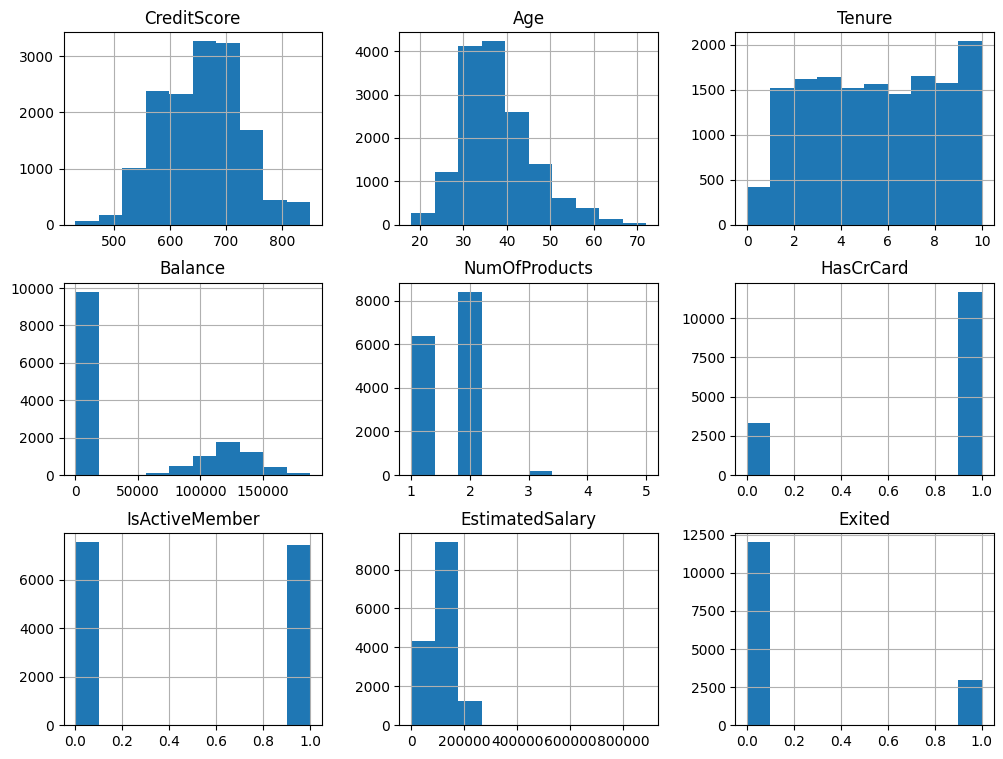

In [123]:
train_set.hist(figsize=(12,9))
plt.show()

In [124]:
#EstimatedSalary ustunida noodatiy qiymat borligini grafikdan ko'rishimiz mumkin
train_set.EstimatedSalary.describe()

,EstimatedSalary
count,15000.000000
mean,116944.059867
std,46047.485455
min,11.580000
25%,82644.332500
50%,122449.420000
75%,155703.022500
max,885120.790000


In [125]:
train_set[train_set['EstimatedSalary']>200000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6309,774.0,France,Male,33.0,1.0,0.0,2.0,1.0,0.0,885120.79,0.0


In [126]:
train_set = train_set[train_set['EstimatedSalary'] < 200000]

In [127]:
train_set.Gender.unique(), train_set.Geography.unique()

(array(['Male', 'Female'], dtype=object),
 array(['France', 'Spain', 'Germany'], dtype=object))

In [128]:
#Kategorik ustunlarni .map orqali son ko'rinishiga keltiramiz
train_set.Geography = train_set.Geography.map({'France': 0, 'Spain': 1, 'Germany': 2})
train_set.Gender = train_set.Gender.map({'Male': 1, 'Female': 0})
test_set.Geography = test_set.Geography.map({'France': 0, 'Spain': 1, 'Germany': 2})
test_set.Gender = test_set.Gender.map({'Male': 1, 'Female': 0})

In [129]:
train_set.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,657.849057,0.576038,0.565171,37.710447,5.018935,42340.930268,1.590506,0.779119,0.496033,116892.844671,0.198480
std,72.674974,0.775639,0.495751,8.145060,2.787306,59704.037114,0.525829,0.414855,0.500001,45619.784362,0.398869
min,431.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,602.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82641.025000,0.000000
50%,661.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.190000,0.000000
75%,707.000000,1.000000,1.000000,42.000000,7.000000,109639.835000,2.000000,1.000000,1.000000,155700.150000,0.000000
max,850.000000,2.000000,1.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,199953.330000,1.000000


In [130]:
train_set.corrwith(train_set.Exited).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.449414
NumOfProducts,0.312795
Geography,0.206708
IsActiveMember,0.188789
Gender,0.169442
Balance,0.160042
CreditScore,0.052327
EstimatedSalary,0.036083
Tenure,0.032947


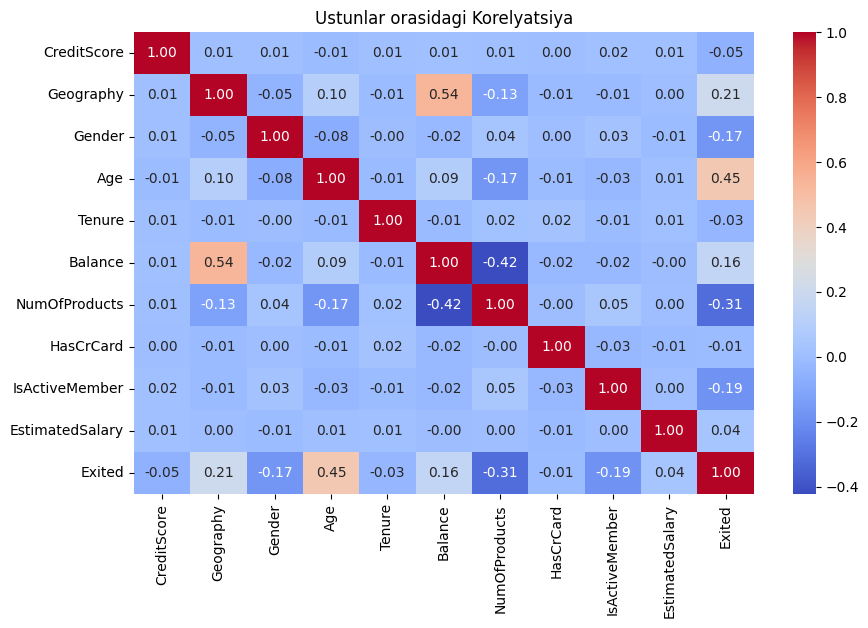

In [131]:
plt.figure(figsize=(10,6))
sns.heatmap(train_set.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ustunlar orasidagi Korelyatsiya")
plt.show()

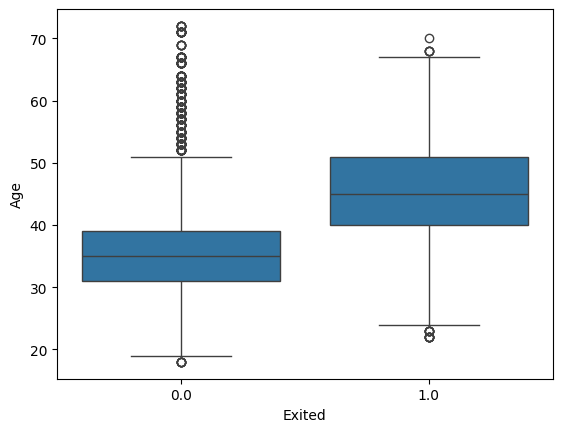

In [132]:
sns.boxplot(x=train_set["Exited"], y=train_set["Age"])
plt.show()

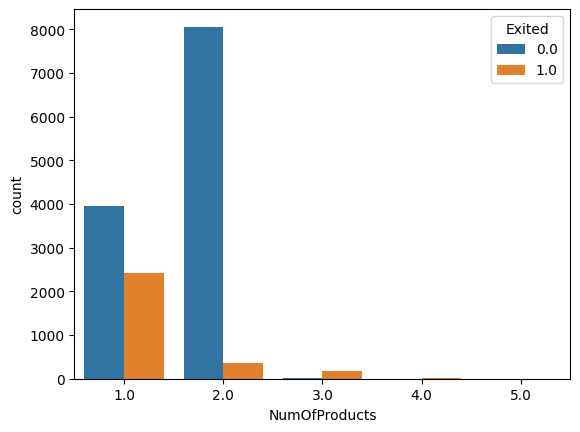

In [133]:
#Bankimiz yangi mijozlarga ko'proq imkoniyat beradiganga o'xshaydi:)
sns.countplot(x=train_set["NumOfProducts"], hue=train_set["Exited"])
plt.show()

In [134]:
train_set.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


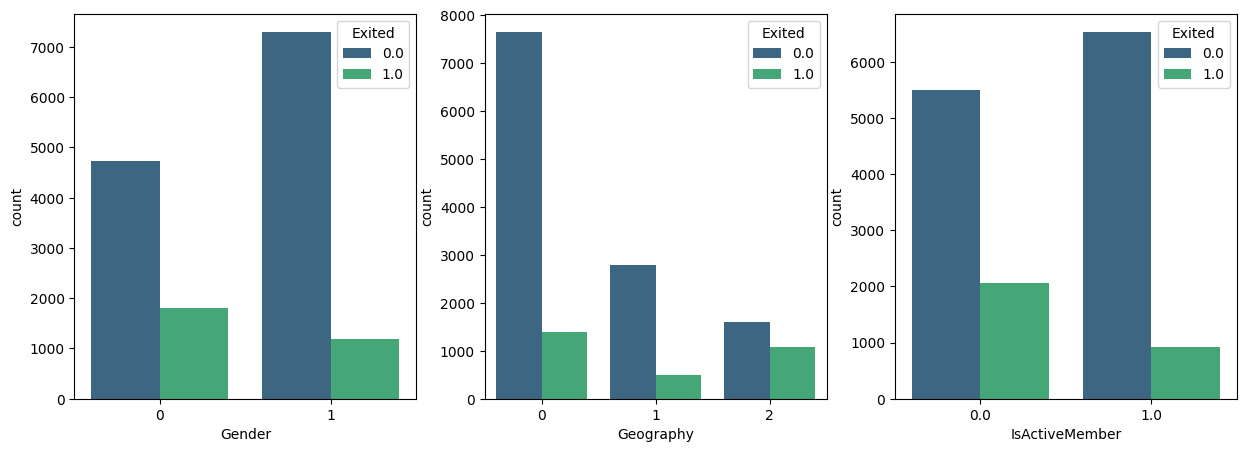

In [135]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=train_set, ax=axes[0])

sns.countplot(x='Geography', hue='Exited', palette='viridis', data=train_set, ax=axes[1])

sns.countplot(x='IsActiveMember', hue='Exited', palette='viridis', data=train_set, ax=axes[2])

plt.show()

In [136]:
#Exited dagi balansni tekshirib olamiz
train_set.Exited.value_counts()

,count
Exited,
0.0,12022
1.0,2977


In [137]:
scaler = StandardScaler()
train_set[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(train_set[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [138]:
X = train_set.drop('Exited', axis=1)
y = train_set.Exited

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
#balans 4:1 nisbatda
#SMOTE orqali datamizni balansga keltirib olamiz
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# **ML**

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2428
         1.0       0.70      0.72      0.71       572

    accuracy                           0.89      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.89      0.89      0.89      3000

Model aniqligi: 0.8873333333333333


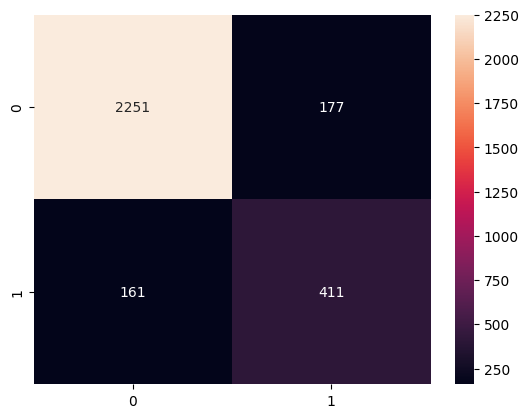

In [146]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      2428
         1.0       0.69      0.77      0.73       572

    accuracy                           0.89      3000
   macro avg       0.82      0.84      0.83      3000
weighted avg       0.90      0.89      0.89      3000

Model aniqligi: 0.891


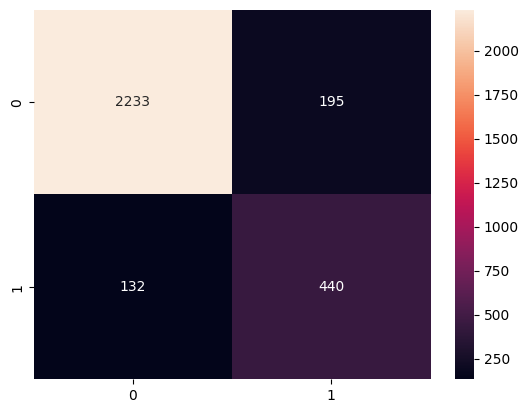

In [148]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2428
         1.0       0.65      0.82      0.73       572

    accuracy                           0.88      3000
   macro avg       0.80      0.86      0.83      3000
weighted avg       0.90      0.88      0.89      3000

Model aniqligi: 0.8826666666666667


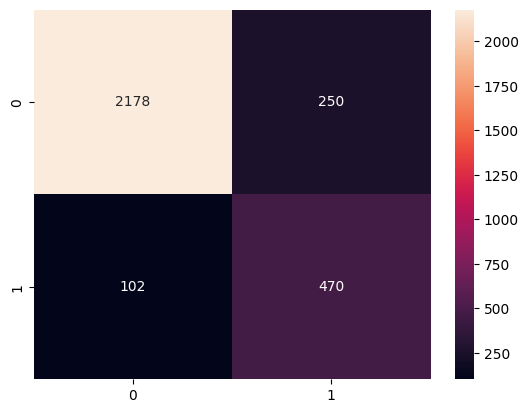

In [152]:
# Modelni yaratamiz (training)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

In [153]:
models = {
    "Random Forest": RF_model,
    "XGBoost": xgb_model,
    "Gradient Boosting": gb_model,
}


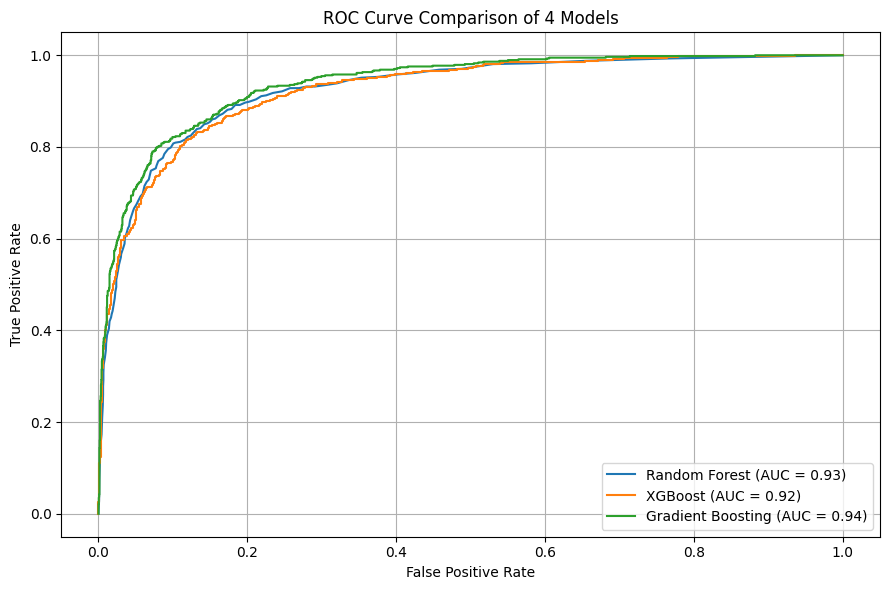

In [154]:
plt.figure(figsize=(9, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of 4 Models')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


In [155]:

#GreadientBoosting modelini tanlaymiz
predict = gb_model.predict(test_set)
loan_repayment =  pd.DataFrame({'id': df_test.id, 'Exited': predict})

In [156]:

loan_repayment.to_csv('loan_repayment.csv', index=False)